In [ ]:
#ANN - Artificial Neural Network

In [ ]:
#Framework for Deep learning
#old - Caffe, Theano, Tefla, Torch
#New -Tensorflow ( Google), Pytorch(Facebook), CNTK-cognective tool kit(Micorsoft)

#Wrapper - (API)
# Keras

#Now keras become official wrapper for only Tensorflow

In [ ]:
#Those who are on local system (jyupter notebook) might need to install the tensorflow ( one time activity)
# ! pip install tensorflow==2.0.0
# colab people dont need to install it as it is pre-installed 

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
tf.keras.__version__

'2.4.0'

In [ ]:
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
# X- images
# y- Labels


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape # 60k are the images, and 28 is the heigth and width, Channel is not provided so default is 1 so that means its gray scale

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
import matplotlib.pyplot as plt


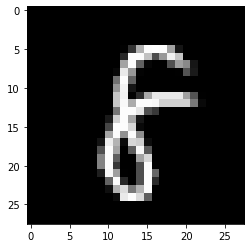

In [ ]:
plt.imshow(x_train[456],cmap='gray')

In [ ]:
# 1. Collect the data (images and labels both)
# 2. preprocess the data (images and labels)

In [ ]:
# preprocesing of images
# 1. Normalization of scaling (max scaler)
# EX- [0,5,10,15]/15 = [0,0.3,0.5,1]

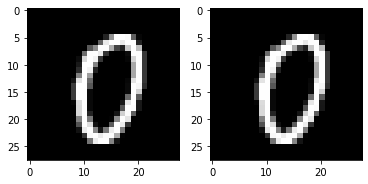

In [ ]:
plt.subplot(121)
plt.imshow(x_train[1000],cmap='gray')
plt.subplot(122)
plt.imshow(x_train[1000]/255.0,cmap='gray') 


In [ ]:
#2.2 Normalize the images (divide them 255)
X_train = x_train / 255

In [ ]:
print(X_train[1000])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#2.2 Preprocessing the labels (One hot encoding)
y_train_proc = tf.keras.utils.to_categorical(y_train)

In [ ]:
y_train_proc[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train_proc[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Validation cut
#X_train, y_train_proc - to get 10% of data


In [ ]:
x_train.shape, y_train_proc.shape

((60000, 28, 28), (60000, 10))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train_proc, test_size=0.1)

In [ ]:
x_train.shape, y_train_proc.shape, x_val.shape, y_val.shape   # - Validation dataset

((54000, 28, 28), (60000, 10), (6000, 28, 28), (6000, 10))

In [ ]:
#Make the model
#1. Create a sequential model
model = tf.keras.models.Sequential()

# Add flatten layer with input shape
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# In the first layer always try to pass the input_shape of image(also input_shape should be only pass in first layer)

# Add a Dense layer with 512 units
model.add(tf.keras.layers.Dense(1028,tf.keras.activations.relu))
# We do an activation after the layer (ReLu)
model.add(tf.keras.layers.Dense(728,tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(512,tf.keras.activations.relu))

# Final layer with 10 neurons and softmax as a activation
model.add(tf.keras.layers.Dense(10,tf.keras.activations.softmax))
# Softmax is special activation used in last layer of classification problem


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1028)              806980    
_________________________________________________________________
dense_1 (Dense)              (None, 728)               749112    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               373248    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,934,470
Trainable params: 1,934,470
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])

In [ ]:
model.fit(x_train, y_train, epochs=15, validation_data=(x_val,y_val))

Epoch 1/15
1688/1688 [==============================] - 8s 3ms/step - loss: nan - acc: 0.0988 - val_loss: nan - val_acc: 0.1030
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: nan - acc: 0.0986 - val_loss: nan - val_acc: 0.1030
Epoch 3/15
1688/1688 [==============================] - 4s 3ms/step - loss: nan - acc: 0.0979 - val_loss: nan - val_acc: 0.1030
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: nan - acc: 0.0962 - val_loss: nan - val_acc: 0.1030
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: nan - acc: 0.0999 - val_loss: nan - val_acc: 0.1030
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: nan - acc: 0.0976 - val_loss: nan - val_acc: 0.1030
Epoch 7/15
1688/1688 [==============================] - 4s 3ms/step - loss: nan - acc: 0.0991 - val_loss: nan - val_acc: 0.1030
Epoch 8/15
1688/1688 [==============================] - 5s 3ms/step - loss: nan - acc: 0.0983 - val_loss

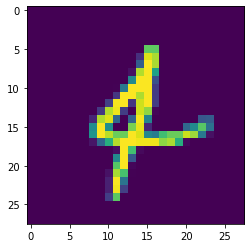

In [ ]:
plt.imshow(x_test[300])

In [ ]:
import numpy as np
model.input_shape    # None - no of images, 28 is the height and width of image

(None, 28, 28)

In [ ]:
img = x_test[400]
img = img/255

In [ ]:
img.shape

(28, 28)

In [ ]:
img = np.expand_dims(img,axis=0)

In [ ]:
res= model.predict(img)

In [ ]:
res

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [ ]:
[round(i,2) for i in res[0]]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test_pred = model.predict(x_test)

In [ ]:
# y predict for 10000 images and for each image you have 10 probabilities,
y_test_pred.shape

(10000, 10)

In [ ]:
#we took the argmax to know the value for each image
y_test_pred_num = np.argmax(y_test_pred, axis=1)

In [ ]:
#compare this above answer with actual answer in y_test

(y_test_pred_num == y_test).sum()

980

In [ ]:
wrong_predicted = np.where(y_test_pred_num != y_test)

In [ ]:
wrong_predicted

(array([   0,    1,    2, ..., 9997, 9998, 9999]),)

In [ ]:
wrong_predicted[0].shape

(9020,)

Actual=5 and model predicted 0


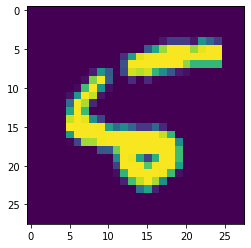

In [ ]:
num= 8
plt.imshow(x_test[num])
print(f"Actual={y_test[num]} and model predicted {y_test_pred_num[num]}")

In [ ]:
{index:round(i,3) for index, i in enumerate(y_test_pred[num])}

{0: nan,
 1: nan,
 2: nan,
 3: nan,
 4: nan,
 5: nan,
 6: nan,
 7: nan,
 8: nan,
 9: nan}